# 📘 Student Performance Predictor

## 📌 Introduction
In this project, my aim was to predict student math scores using various demographic and academic preparation features. The dataset is sourced from Kaggle and contains attributes like gender, parental education, and test preparation.

## 📂 Data Loading & Preprocessing
I directly uploaded the files from my local storage, since there were many non numeric values encoding was needed to make them into a numeric form. I used the one hot ending.
## 📊 Exploratory Data Analysis (EDA)
We visualize how factors such as test preparation and parental education influence scores in math, reading, and writing.

## 🔧 Model Preparation and Evaluation

### ✂️ Feature Selection
I manually selected a few text columns and 1 numeric column i.e the reading scores for the feature selection.

### 📊 Train-Test Split
The test split was set as 0.2 meaning 20 percent of the data was used to test the model and the remaining 80 for the training.

### 🏗️ Model Training
 Train a linear regression model to predict math scores based on selected features.

### 📉 Model Evaluation
We evaluate the model using:
- R² Score: measures how well the model explains variance. My model gives 0.84. It should be close to 1.
- MSE: Mean Squared Error, lower is better.

## 📈 Results and Insights
The model performance is visualized using a plot comparing actual vs predicted scores.

## ✅ Conclusion
This project demonstrates a basic regression pipeline and highlights the impact of educational and demographic factors on student performance.


In [2]:
#from google.colab import files

#upload=files.upload()

import pandas as pd

df = pd.read_csv('study_performance.csv')

df.head(10)


KeyboardInterrupt: 

`I compared different factors with each other and visualized by bar chart.`

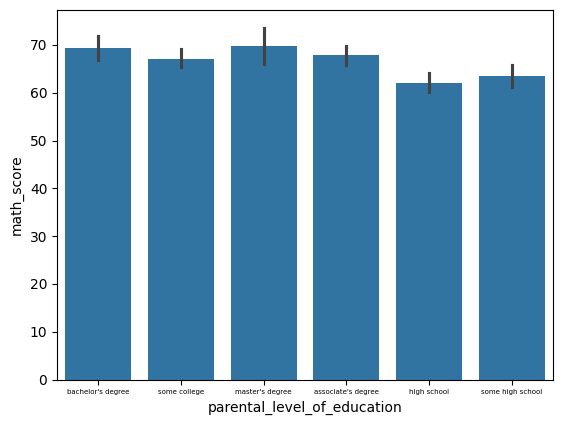

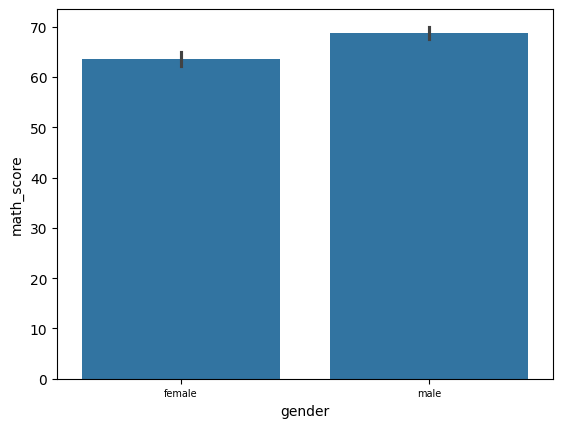

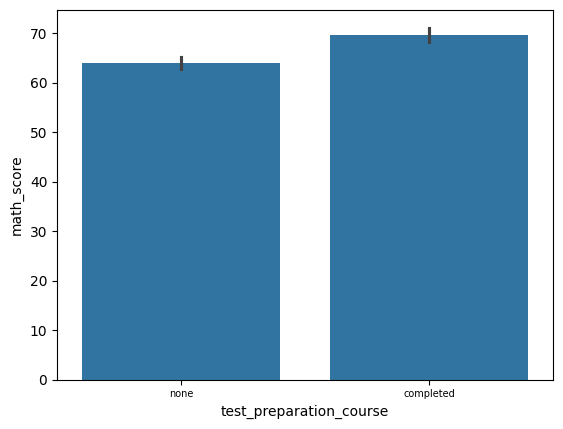

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.xticks(fontsize=5)
sns.barplot(x='parental_level_of_education', y='math_score', data=df)
plt.show()

sns.barplot(x='gender',y='math_score', data=df)
plt.xticks(fontsize=7)#
plt.show()

sns.barplot(x='test_preparation_course',y='math_score',data=df, estimator='mean')
plt.xticks(fontsize=7)
plt.show()


In [1]:
# One-hot encode categorical features
import pandas as pd

df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded=df_encoded.astype(int)
df_encoded.head()

NameError: name 'df' is not defined

`Feature Selection`

In [ ]:

my_cols = [
    'gender_male',
    'test_preparation_course_none',
    'parental_level_of_education_some college',
    'parental_level_of_education_some high school',
    'parental_level_of_education_high school',
    'reading_score',
    "parental_level_of_education_master's degree"
]
#feature columns
X = df_encoded[my_cols]


#X=df_encoded.drop('maths_score',axis=1)
#target variable
Y=df_encoded['math_score']

In [ ]:
print(df_encoded.columns.tolist())

['math_score', 'reading_score', 'writing_score', 'gender_male', 'race_ethnicity_group B', 'race_ethnicity_group C', 'race_ethnicity_group D', 'race_ethnicity_group E', "parental_level_of_education_bachelor's degree", 'parental_level_of_education_high school', "parental_level_of_education_master's degree", 'parental_level_of_education_some college', 'parental_level_of_education_some high school', 'lunch_standard', 'test_preparation_course_none']


`split the features (X) and target (Y) into training and testing sets: 80% for training, 20% for testing.`

In [ ]:
from sklearn.model_selection import train_test_split

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_Train,Y_Train)


LinearRegression()

R² (R-squared) measures how well the model's predictions (`Y_pred`) match the actual target values (`Y_Test`). The variance btw the actual and the predicted math scores. It should be best close to `0`.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X_Test)

print("R² score:", r2_score(Y_Test, Y_pred))
print("MSE:", mean_squared_error(Y_Test, Y_pred))


R² score: 0.842370881771948
MSE: 38.357217423025006


📈 Visual Evaluation of the Model

` 1. Actual vs Predicted Plot`
This shows how close the model’s predictions are to the actual math scores.  
Ideally, the points should fall on a straight diagonal line — more scatter means lower accuracy.

 `2. Residual Plot`
This plot shows the difference between predicted and actual values (called residuals).  
A good model should have residuals randomly scattered around zero.  
Patterns in the residuals may indicate underfitting or overfitting.


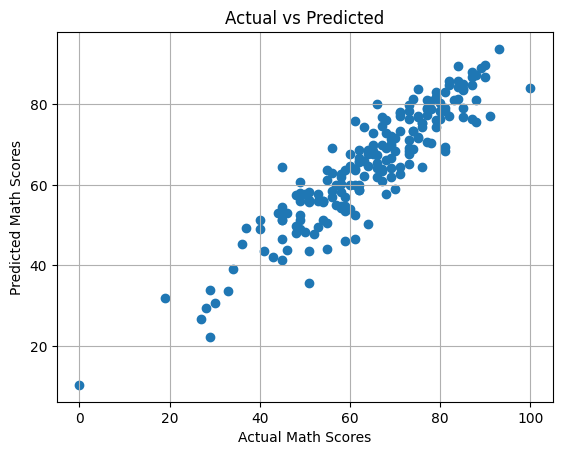

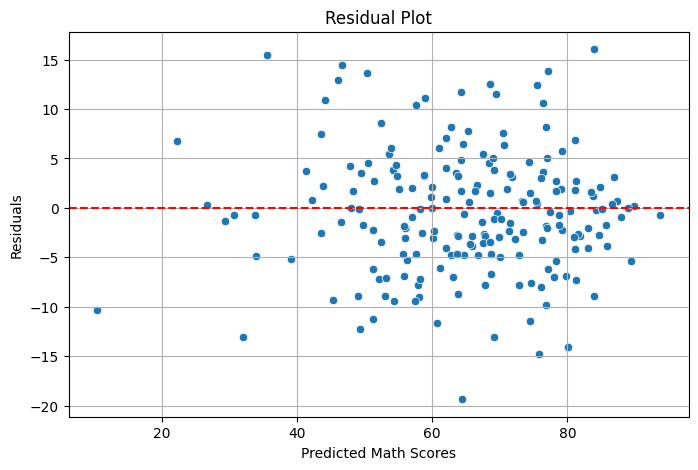

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(Y_Test, Y_pred)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

residuals = Y_Test - Y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Math Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

